### Creating a random forest model


In [2]:

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
import numpy as np

df_cars = pd.read_csv('../data2/Cars93.csv')
df_cars.head(10)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


#### Getting info about data

In [2]:
df_cars.describe()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


### Drop tables 
Getting rid of tables that cause conflict with the test dataset.

In [3]:
df2 = df_cars.drop(['Manufacturer', 'Model', 'AirBags', 'Man.trans.avail', 'Make', 'Unnamed: 0','Cylinders','Type', 'DriveTrain', 'Origin'], axis =1)
df2

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,NaN,3960
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.0,2985
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.0,2810
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.0,2985


### Dealing with possible NAs

In [4]:
for col in df2:
    if df2[col].isnull().sum() > 0:
        try:
            df2[col].fillna(df2[col].mean(), inplace = True)
        except:
            df2[col].fillna(df2[col].mode()[0],inplace = True)


df2


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.000000,2705
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.000000,3560
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.000000,3375
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.000000,3405
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.000000,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,13.890244,3960
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.000000,2985
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.000000,2810
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.000000,2985


### Preparing for testing and training
- Initialize X -Observed and Y-Predicted (what are you trying to predict with the model)

In [5]:
#spliting for test/train
X = df2[['RPM','EngineSize','Weight']]
y = df2['MPG.city']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20)

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((74, 3), (19, 3), (74,), (19,))

In [7]:
#create the random forest model
model =  RandomForestRegressor(n_estimators = 100, random_state =42) 

In [8]:
#fitting the model
fit_cars = model.fit(X_train,y_train)


#### Metrics
Find out how your model is working

In [9]:
#The training r_sq
print("score:%.2f" %fit_cars.score(X_train,y_train))

score:0.97


In [10]:
#Prediction on training dataset
y_trainPred = fit_cars.predict(X_train)
y_trainPred[:10]

array([20.51, 32.15, 21.34, 22.05, 37.33, 20.67, 22.8 , 19.17, 19.4 ,
       28.37])

In [11]:
#r2
print("R_sq:%.2f" %r2_score(y_train,y_trainPred))

R_sq:0.97


In [12]:
print("mae: %.2f" %mean_absolute_error(y_train,y_trainPred))

mae: 0.69


In [13]:
print("mse: %.2f" %mean_squared_error(y_train,y_trainPred))

mse: 0.93


In [14]:
#Root mean squared error
print("rmse: %.2f" %np.sqrt(mean_squared_error(y_train,y_trainPred)))

rmse: 0.97


In [15]:
#explained variance score
print("evs: %.2f" %explained_variance_score(y_train,y_trainPred))

evs: 0.97


### Prediction on testing data


In [16]:
y_testPred = fit_cars.predict(X_test)
y_testPred[:10]

array([26.75, 19.13, 21.58, 19.4 , 19.01, 22.73, 18.61, 16.69, 19.17,
       28.44])

In [17]:
print("R_sq:%.2f" %r2_score(y_test,y_testPred))

R_sq:0.63


In [18]:
#OR
print("R_sq:%.2f" %fit_cars.score(X_test,y_test))

R_sq:0.63


In [19]:
print("mse: %.2f" %mean_squared_error(y_test,y_testPred))

mse: 15.42


In [20]:
print("mae: %.2f" %mean_absolute_error(y_test,y_testPred))

mae: 2.34


In [21]:
print("rmse: %.2f" %np.sqrt(mean_squared_error(y_test,y_testPred)))

rmse: 3.93


In [22]:
print("evs: %.2f" %explained_variance_score(y_test,y_testPred))

evs: 0.65


### Visualization
- Bar graph - Feature Importance
- Line graph - Predicted vs Observed
- Scatter plot  - Prediction vs Observed

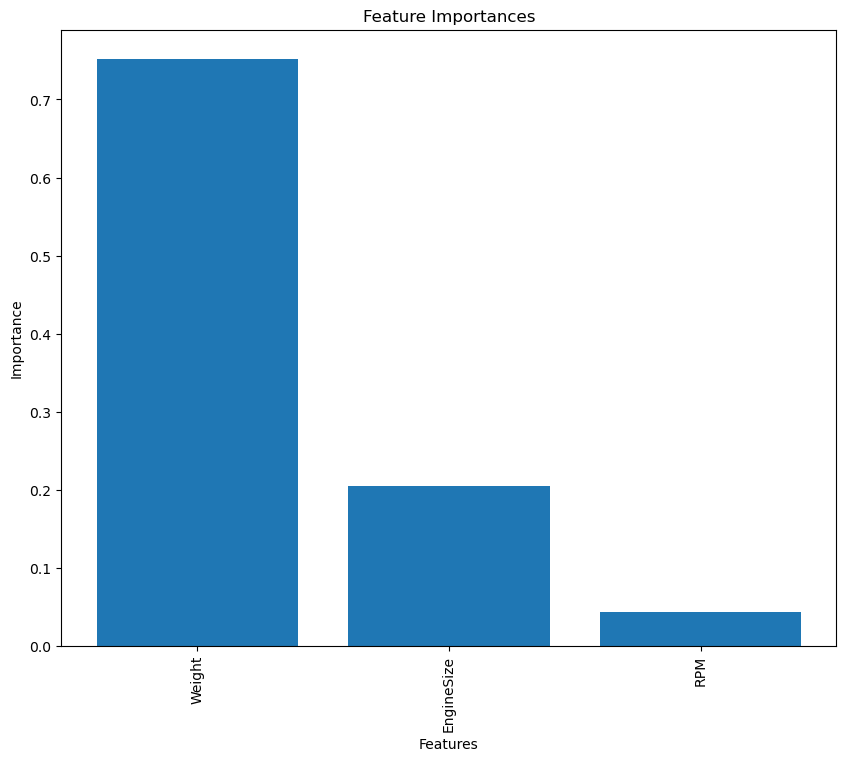

In [23]:
# Sort the feature importances in descending order
importances = fit_cars.feature_importances_  
 # Get the top 10 most important features 
indices = np.argsort(importances)[::-1]

# Plot the feature importances as a bar graph 
top_features = indices[:4] 

plt.figure(figsize=(10,8)) 
plt.bar(range(3), importances[top_features])
plt.xticks(range(3), X.columns[top_features], rotation=90) 
plt.xlabel("Features") 
plt.ylabel("Importance") 
plt.title("Feature Importances") 
plt.show()

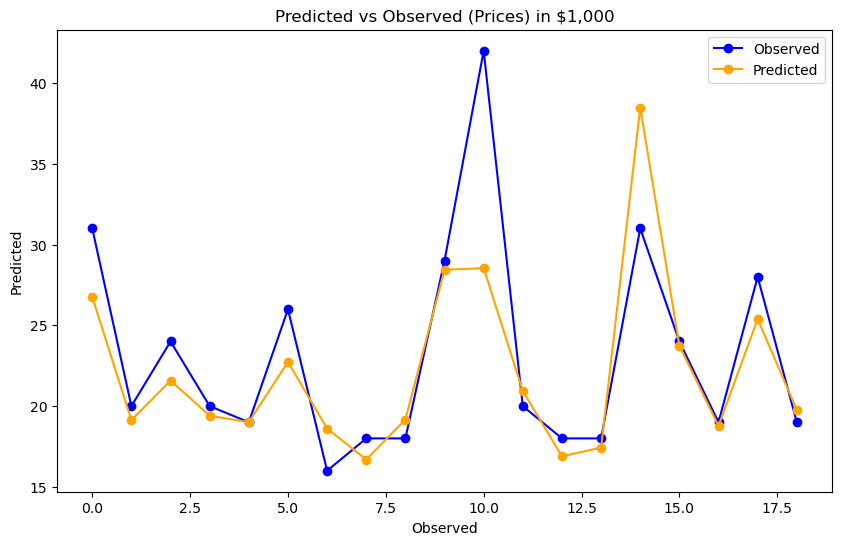

In [24]:
#setting boundaries and parameters
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
# plt.plot( linestyle='--', marker='o', color='b', label='line with marker')

#plotting
plt.plot(x_ax,y_test,label='Observed',marker = 'o',color = 'blue',linestyle='-')
plt.plot(x_ax,y_testPred,label='Predicted',marker = 'o',color = 'orange',linestyle='-')
plt.title('Predicted vs Observed (Prices) in $1,000')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend()



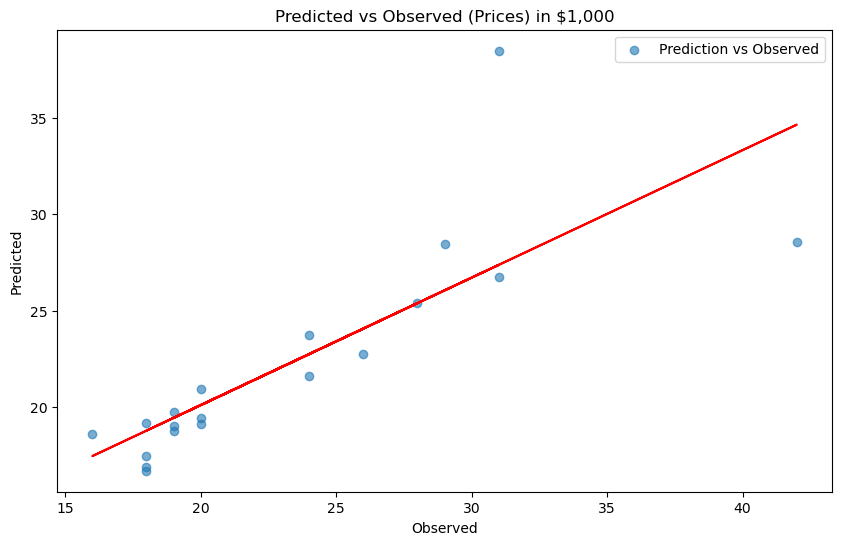

In [25]:
# calculate slope and intercept of regression line
slope, intercept = np.polyfit(y_test, y_testPred, 1)

# plot scatter plot
plt.scatter(x = y_test, y = y_testPred ,label='Prediction vs Observed',marker='o',alpha = 0.6)

# add regression line to scatter plot
plt.plot(y_test, slope*y_test + intercept, color='red')

# add labels
plt.title('Predicted vs Observed (Prices) in $1,000')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.legend()

plt.show()
